In [92]:
#Part 1
##Frequency configuration
  #Number of samples =  256
  #Frequency range =  [1417.5, 1422.5]

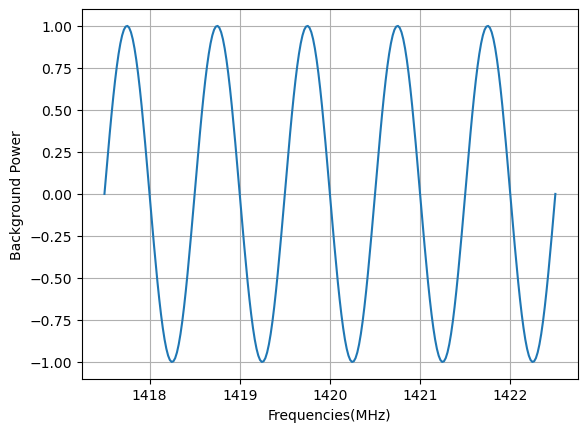

In [93]:
##Step 1, 2, 3

import numpy as np
import matplotlib.pyplot as plt

#choose number of samples

num_samples = 256

#frequency range(in MHz)

start_freq = 1417.5
end_freq = 1422.5

#generate frequency axis
frequencies = np.linspace(start_freq, end_freq, num_samples)


#background signal = sin(2*π*f)
background = np.sin(2*np.pi*(frequencies-start_freq))


# plot the graph of power to frequencies
plt.plot(frequencies, background)
plt.xlabel("Frequencies(MHz)")
plt.ylabel("Background Power")
plt.grid(True)
plt.show()

In [94]:
##Moving to step 4 where we add Gaussian Noise to the background signal

#100 steps(arbitrary number)
number_of_steps = 100

#std_diviation
noise_std = 0.05


#noisy signal for each time segment(background + noise)
noisy_signals = []

#loop through every step
for step in range(number_of_steps):

    #add noise to the background signal
    noise = np.random.normal(loc = 0, scale = noise_std, size = background.size)

    #noisy signal
    noisy_signal = background + noise

    #append noisy signal to the array of noisy signals
    noisy_signals.append(noisy_signal)


signal_matrix = np.array(noisy_signals)

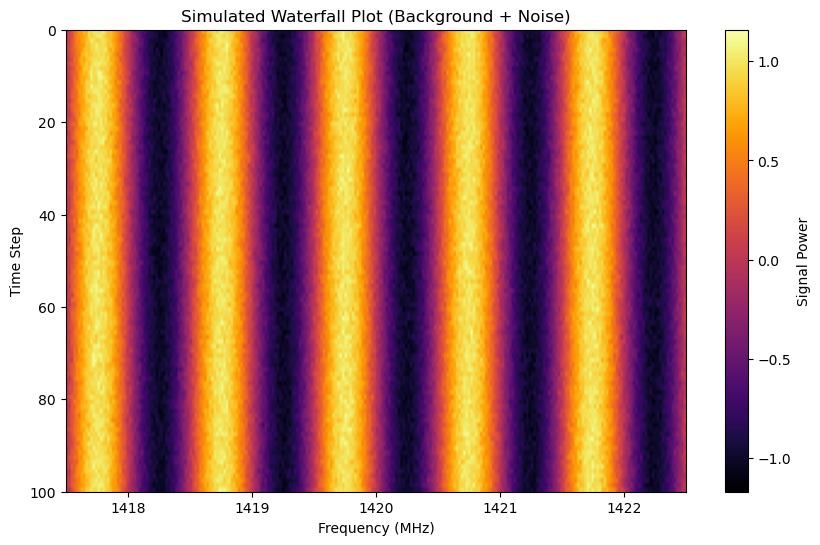

In [95]:
##step 5, 6

plt.figure(figsize=(10, 6))

#heatmap creation

plt.imshow(
    signal_matrix,
    aspect='auto',
    cmap='inferno',  
    extent=[frequencies[0], frequencies[-1], number_of_steps, 0]
)
plt.colorbar(label='Signal Power')
plt.xlabel('Frequency (MHz)')
plt.ylabel('Time Step')
plt.title('Simulated Waterfall Plot (Background + Noise)')
plt.savefig("waterfall_plot.png", dpi=300)

plt.show()

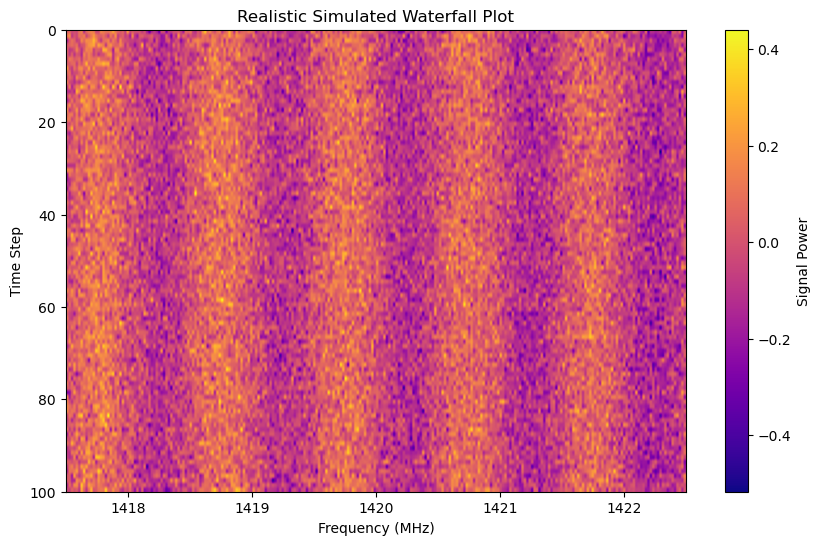

In [96]:
##Step 7
#Steps to make the signal look more realistic 
   #1)Change the background signal to something more realistic, not just a sin function
   #2)Increase the noise levels


noise_std = 0.1

#background_signal = 0.1sin(2π(f - fstart))-0.002*(f-fstart)^2
background = (
    0.1 * np.sin(2 * np.pi * (frequencies - 1417.5)) +
    -0.002 * (frequencies - 1417.5)**2 
)

#Same process as before


noisy_signals = []

for step in range(number_of_steps):
    noise = np.random.normal(0, noise_std, size=background.shape)
    noisy_signal = noise + background
    noisy_signals.append(noisy_signal)

signal_matrix_real = np.array(noisy_signals)


#plotting
plt.figure(figsize=(10, 6))
plt.imshow(
    signal_matrix_real,
    aspect='auto',
    cmap='plasma',  # Try a different colormap if you want
    extent=[frequencies[0], frequencies[-1], number_of_steps, 0]
)
plt.colorbar(label='Signal Power')
plt.xlabel('Frequency (MHz)')
plt.ylabel('Time Step')
plt.title('Realistic Simulated Waterfall Plot')
plt.show()



In [97]:
## Creating the "on" signal

  #We will make the spectral line shape as signal with a "bump" or peak at 1420 MHz
  #No background signal and no noise
  #The spectral line shape(peak) will be a Gaussian peak

In [98]:
#This is the spectral line as a gaussian peak
#The amplitude tells how tall the peak is
#The width tells how narrow it is

def generate_spectral_line(frequencies, center=1420.0, amplitude=0.3, width=0.02):
    return amplitude * np.exp(-0.5 * ((frequencies - center) / width) ** 2)

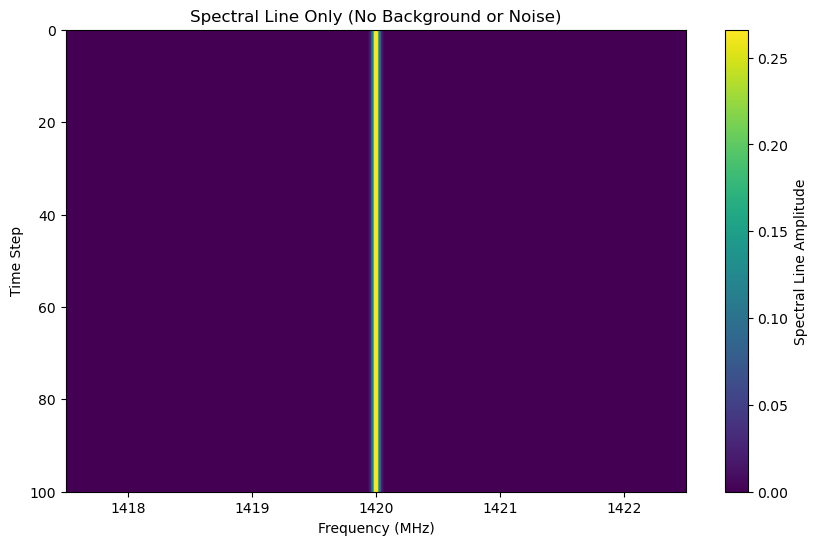

In [99]:
#spectral line across all frequecnies and time steps
#frequecnies is defined in the first cell
spectral = generate_spectral_line(frequencies)

#we will use np.title to copy the array spectral 100 times

spectral_matrix = np.tile(spectral, (number_of_steps, 1))


#plot spectral line
plt.figure(figsize=(10, 6))
plt.imshow(
    spectral_matrix,
    aspect='auto',
    cmap='viridis',
    extent=[frequencies[0], frequencies[-1], number_of_steps, 0]
)
plt.colorbar(label='Spectral Line Amplitude')
plt.xlabel('Frequency (MHz)')
plt.ylabel('Time Step')
plt.title('Spectral Line Only (No Background or Noise)')

plt.show()


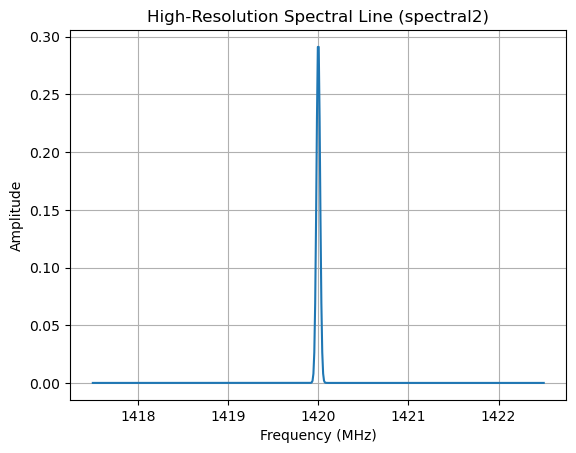

In [100]:
#Create spectral2 with 512 samples

num_samples_highres = 512
frequencies_highres = np.linspace(start_freq, end_freq, num_samples_highres)

spectral2 = generate_spectral_line(frequencies_highres)

plt.plot(frequencies_highres, spectral2)
plt.title("High-Resolution Spectral Line (spectral2)")
plt.xlabel("Frequency (MHz)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.savefig("your_filename.png", dpi=300)

plt.show()


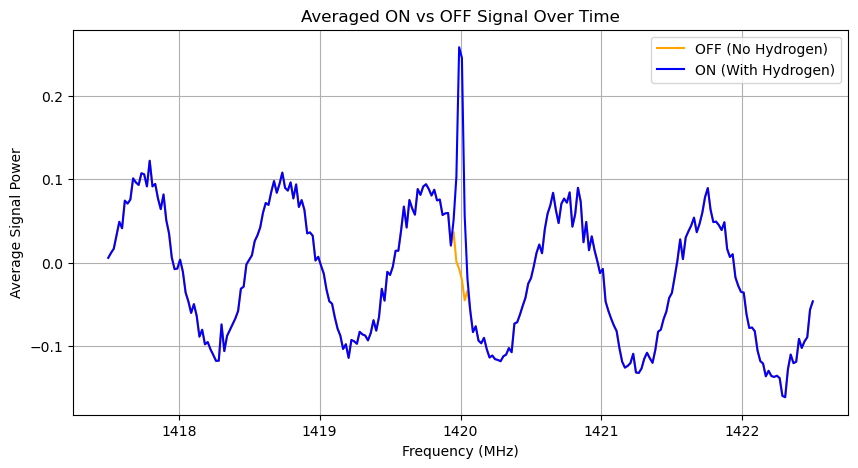

In [101]:
##Part 2

#2.1

signal_on = spectral_matrix + signal_matrix_real #on signal = background+noise+spectral line

signal_off = signal_matrix_real #off signal = noise+background


avg_on = np.mean(signal_on, axis = 0)
avg_off = np.mean(signal_off, axis=0)


plt.figure(figsize=(10, 5))
plt.plot(frequencies, avg_off, label='OFF (No Hydrogen)', color='orange')
plt.plot(frequencies, avg_on, label='ON (With Hydrogen)', color='blue')
plt.xlabel("Frequency (MHz)")
plt.ylabel("Average Signal Power")
plt.title("Averaged ON vs OFF Signal Over Time")
plt.legend()
plt.grid(True)
plt.savefig("averaged_on_off.png", dpi=300)  # Optional: save the image
plt.show()


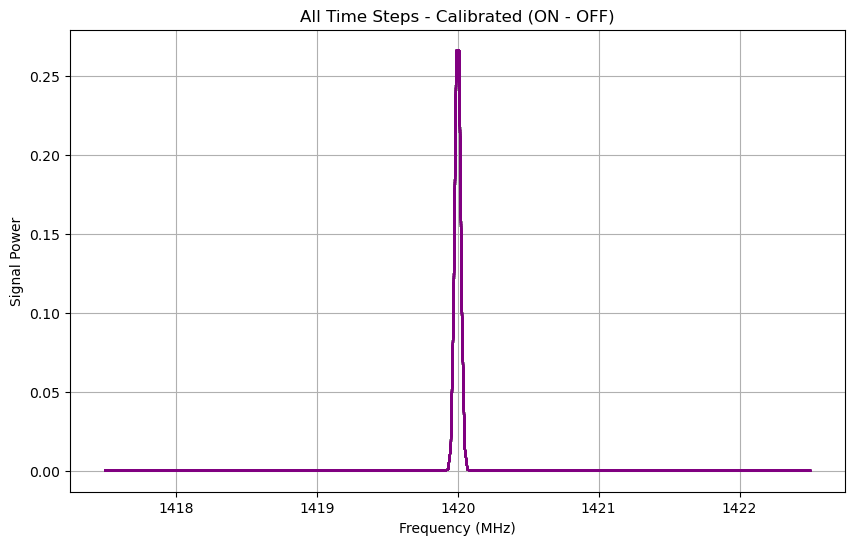

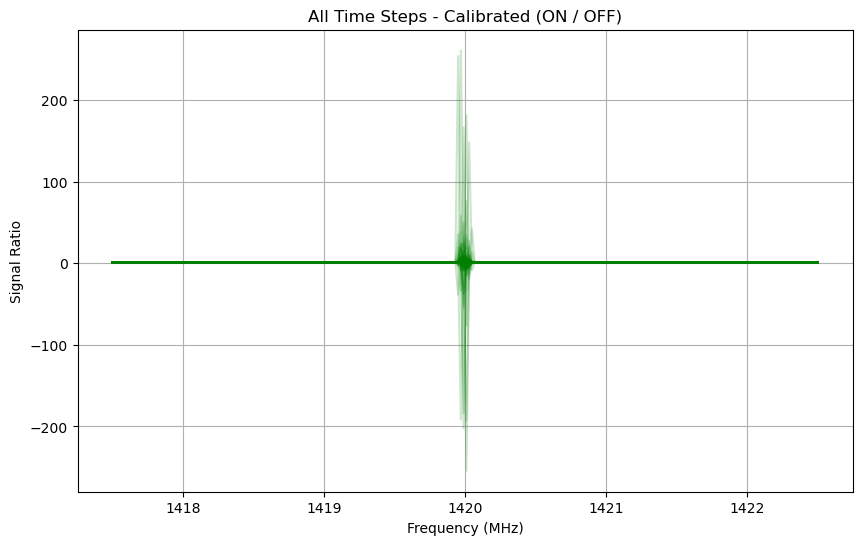

In [102]:
#2.2

calibrated_ratio = signal_on/signal_off #on/off

calibrated_diff = signal_on - signal_off #on-off

plt.figure(figsize=(10, 6))

for t in range(calibrated_diff.shape[0]):
    plt.plot(frequencies, calibrated_diff[t], alpha=0.2, color='purple')  # faded lines

plt.title("All Time Steps - Calibrated (ON - OFF)")
plt.xlabel("Frequency (MHz)")
plt.ylabel("Signal Power")
plt.grid(True)
plt.savefig("calibrated_diff_all_timesteps.png", dpi=300)
plt.show()
plt.figure(figsize=(10, 6))

for t in range(calibrated_ratio.shape[0]):
    plt.plot(frequencies, calibrated_ratio[t], alpha=0.2, color='green')  # faded lines

plt.title("All Time Steps - Calibrated (ON / OFF)")
plt.xlabel("Frequency (MHz)")
plt.ylabel("Signal Ratio")
plt.grid(True)
plt.savefig("calibrated_ratio_all_timesteps.png", dpi=300)
plt.show()


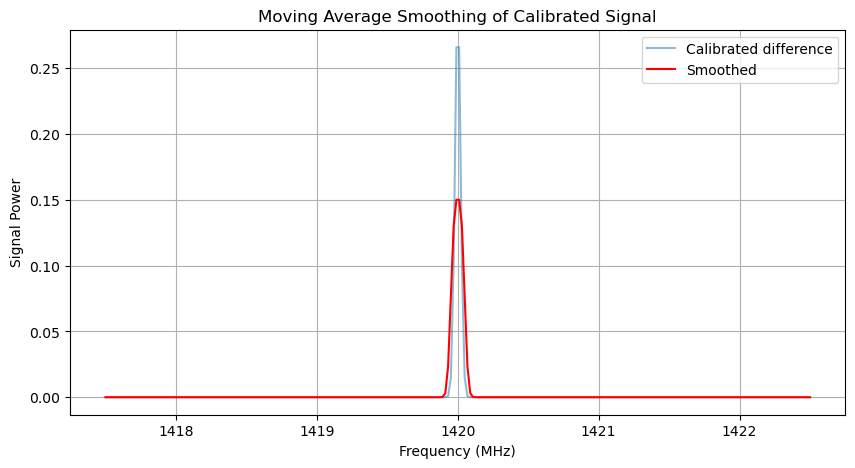

In [103]:
#part 2.3

#we will choose k = 5


N = 5

k = (N-1)//2

smooth = []

avg_calibrated_diff = np.mean(calibrated_diff, axis = 0)

for i in range(len(avg_calibrated_diff)):
    start = max(0, i-k) #start will be either the start of the frequencies or i-k
    
    end = min(len(avg_calibrated_diff), i+k+1) # we do +1 because slicing excludes end

    stend_average = np.mean(avg_calibrated_diff[start:end])
    
    smooth.append(stend_average)

plt.figure(figsize=(10, 5))
plt.plot(frequencies, avg_calibrated_diff, label="Calibrated difference", alpha=0.5)
plt.plot(frequencies, smooth, label="Smoothed", color='red')
plt.xlabel("Frequency (MHz)")
plt.ylabel("Signal Power")
plt.title("Moving Average Smoothing of Calibrated Signal")
plt.legend()
plt.grid(True)
plt.savefig("smooth_signal.png", dpi=300)
plt.show()


In [104]:
##Part 3

#1)We will get to the frequencies around 1420MHz(where we expect to find the spectral line) and find the peaks there.
#2)From all of the peaks we will peak the tallest and thus finding the frequency of the spectral line.


In [105]:


#Finding the frequencies which are inside the search window(frequencies around 1420MHz)
center_freq = 1420

tolerance = 0.1

freq_ind = []

for i in range(len(frequencies)):
    if abs(frequencies[i]-center_freq) <= tolerance:
        freq_ind.append(i)

smooth = np.array(smooth)#converting smooth from list to array for indexing to work
freq_ind = np.array(freq_ind, dtype = int)
window_values = smooth[freq_ind]
max_index = freq_ind[np.argmax(window_values)]
detected_freq = frequencies[max_index]
max_power = smooth[max_index]


print(f"Spectral line at: {detected_freq:.6f} MHz")
print(f"Signal strength: {max_power:.6f} MHz")

Spectral line at: 1419.990196 MHz
Signal strength: 0.150089 MHz
